In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader


In [2]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print(f"{image_path} is exist - skip downloading")
else:
    print("downloading...")
    image_path.mkdir(parents=True, exist_ok=True)
    # download
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("downloading data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("unzipping")
        zip_ref.extractall(image_path)

data\pizza_steak_sushi is exist - skip downloading


In [3]:
import os


def walk_through_dir(dir_path):
    """Walks through dir_path returning its content."""

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories ||| {len(filenames)} image ||| in {dirpath}")

In [4]:
walk_through_dir("data/pizza_steak_sushi")

There are 2 directories ||| 0 image ||| in data/pizza_steak_sushi
There are 3 directories ||| 0 image ||| in data/pizza_steak_sushi\test
There are 0 directories ||| 25 image ||| in data/pizza_steak_sushi\test\pizza
There are 0 directories ||| 19 image ||| in data/pizza_steak_sushi\test\steak
There are 0 directories ||| 31 image ||| in data/pizza_steak_sushi\test\sushi
There are 3 directories ||| 0 image ||| in data/pizza_steak_sushi\train
There are 0 directories ||| 78 image ||| in data/pizza_steak_sushi\train\pizza
There are 0 directories ||| 75 image ||| in data/pizza_steak_sushi\train\steak
There are 0 directories ||| 72 image ||| in data/pizza_steak_sushi\train\sushi


Random_image_path : data\pizza_steak_sushi\train\pizza\3860002.jpg
Image class : pizza
Image height : 512
Image width : 512


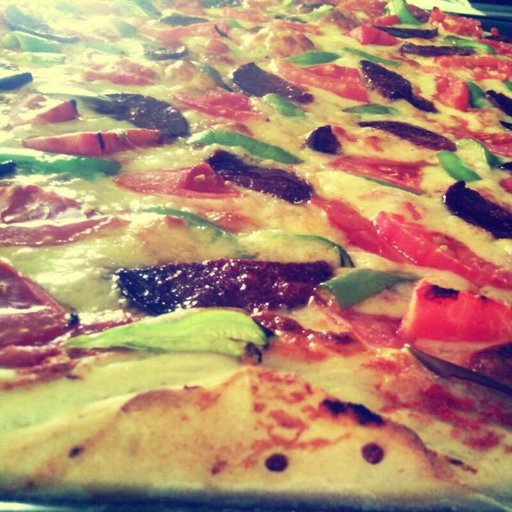

In [5]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random_image_path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height : {img.height}")
print(f"Image width : {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

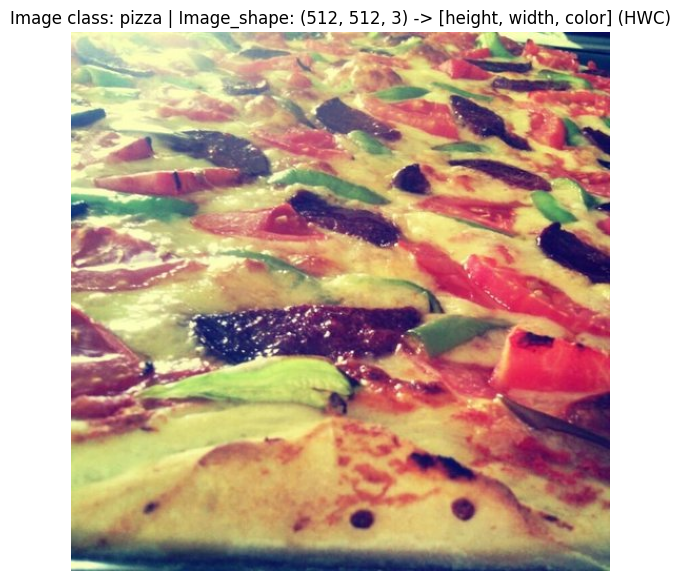

In [6]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image_shape: {img_as_array.shape} -> [height, width, color] (HWC)")
plt.axis(False)

In [7]:
img_as_array


array([[[245, 250, 183],
        [244, 249, 182],
        [245, 247, 182],
        ...,
        [ 12,   9,  86],
        [ 12,   9,  86],
        [ 11,   8,  85]],

       [[251, 255, 189],
        [251, 255, 189],
        [252, 254, 189],
        ...,
        [ 11,  11,  85],
        [ 11,  11,  85],
        [ 11,  11,  85]],

       [[252, 254, 189],
        [252, 254, 189],
        [252, 254, 191],
        ...,
        [  7,  14,  82],
        [  7,  14,  82],
        [  7,  14,  82]],

       ...,

       [[211, 233, 194],
        [212, 234, 195],
        [213, 235, 196],
        ...,
        [123, 158, 126],
        [123, 158, 125],
        [122, 157, 124]],

       [[152, 183, 167],
        [154, 185, 169],
        [154, 187, 170],
        ...,
        [113, 150, 117],
        [119, 156, 122],
        [121, 159, 122]],

       [[102, 137, 131],
        [105, 140, 134],
        [105, 141, 137],
        ...,
        [ 94, 131,  98],
        [108, 145, 111],
        [116, 154, 117]]

In [8]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [9]:
a = transform(img)
a.shape

torch.Size([3, 64, 64])

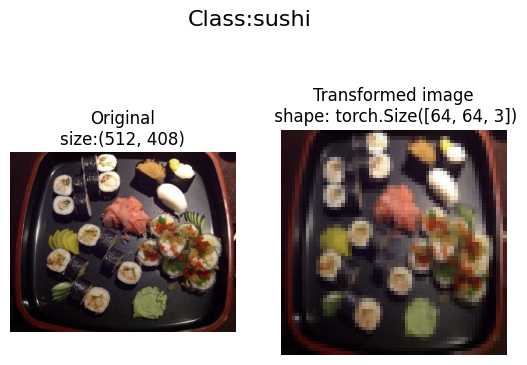

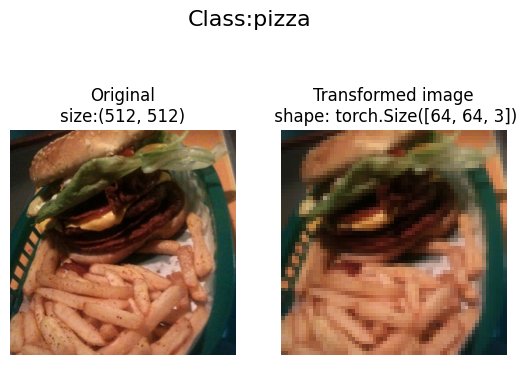

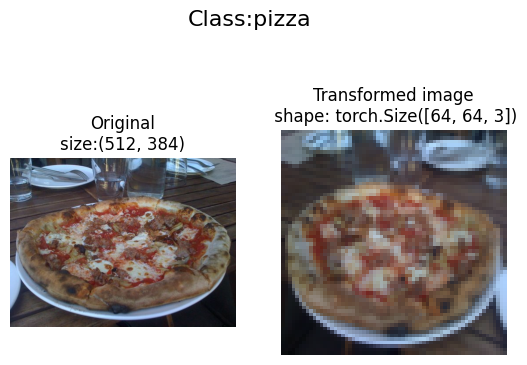

In [10]:
def plot_transformed_images(image_path, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_path = random.sample(image_path, k=n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nsize:{f.size}")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed image\n shape: {transformed_image.shape}")
            ax[1].axis(False)

            plt.suptitle(f"Class:{image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path_list, transform, n=3, seed=42)

In [11]:
image_path_list

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

In [12]:
train_data = datasets.ImageFolder(root="data/pizza_steak_sushi/train", transform=transform, target_transform=None)
test_data = datasets.ImageFolder(root="data/pizza_steak_sushi/test", transform=transform, target_transform=None)

In [13]:
class_names = train_data.classes
class_dict = train_data.class_to_idx

In [14]:
class_names

['pizza', 'steak', 'sushi']

In [15]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [16]:
train_dataloader = DataLoader(train_data, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

In [17]:
imag, label = next(iter(train_dataloader))

In [18]:
imag, label

(tensor([[[[0.6627, 0.6667, 0.6510,  ..., 0.4118, 0.2980, 0.3137],
           [0.6784, 0.6706, 0.6627,  ..., 0.5020, 0.3569, 0.2784],
           [0.6667, 0.6784, 0.6667,  ..., 0.5843, 0.4588, 0.3216],
           ...,
           [0.6353, 0.6314, 0.6471,  ..., 0.6157, 0.6196, 0.6353],
           [0.6314, 0.6353, 0.6588,  ..., 0.6078, 0.6000, 0.6196],
           [0.6275, 0.6353, 0.6549,  ..., 0.5922, 0.5765, 0.6039]],
 
          [[0.6706, 0.6667, 0.6588,  ..., 0.4039, 0.2941, 0.3098],
           [0.6863, 0.6706, 0.6667,  ..., 0.4745, 0.3412, 0.2745],
           [0.6667, 0.6745, 0.6706,  ..., 0.5451, 0.4314, 0.3098],
           ...,
           [0.6157, 0.6078, 0.6196,  ..., 0.5608, 0.5647, 0.5804],
           [0.6118, 0.6157, 0.6353,  ..., 0.5569, 0.5451, 0.5608],
           [0.6078, 0.6118, 0.6314,  ..., 0.5412, 0.5176, 0.5451]],
 
          [[0.7059, 0.6980, 0.6824,  ..., 0.3961, 0.2902, 0.3059],
           [0.7216, 0.7020, 0.6980,  ..., 0.4549, 0.3333, 0.2627],
           [0.7020, 0.70

# Custom DataSet

In [19]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, List, Dict

In [24]:
target_directory = "data/pizza_steak_sushi/train"
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

In [23]:
class_names_found

['pizza', 'steak', 'sushi']

In [27]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Find the class folder names in a target directory."""
    classes = sorted(entry.name for entry in list(os.scandir(directory)) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... Please check file structure.")
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [28]:
find_classes(directory=target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [29]:
from torch.utils.data import Dataset


class ImageFolderCustom(Dataset):
    def __init__(self,
                 targ_dir: str,
                 transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index: int) -> Image.Image:
        """open an image via a path and return it."""
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self) -> int:
        """return the number of total samples."""
        return len(self.paths)

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        """Returns one sample of data, data adn label (X, y)."""
        image = self.load_image(index)
        class_name = self.paths[index].parent.name  # expect path in format "data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]
        if self.transform:
            return transform(image), class_idx
        else:
            return image, class_idx


In [30]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([transforms.Resize(size=(64, 64)), transforms.ToTensor()])

In [31]:
train_data_custom = ImageFolderCustom(targ_dir="data/pizza_steak_sushi/train", transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir="data/pizza_steak_sushi/test", transform=test_transforms)

In [32]:
train_data_custom

In [33]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [34]:
len(train_data), len(train_data_custom)

(225, 225)

In [36]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [37]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
        print(f"for display purpose, n shouldn't be larger than 10. setting n to 10 and display_shape to False")

    if seed:
        random.seed(seed)

    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16, 8))
    for i, target_sample in enumerate(random_samples_idx):
        image, label, = dataset[target_sample][0], dataset[target_sample][1]
        image_adjust = image.permute(1, 2, 0)
        plt.subplot(1, n, i + 1)
        plt.imshow(image_adjust)
        plt.axis("off")
        if classes:
            title = f"Class {classes[label]}"
            if display_shape:
                title += f"\nshape: {image_adjust.shape}"
            plt.title(title)

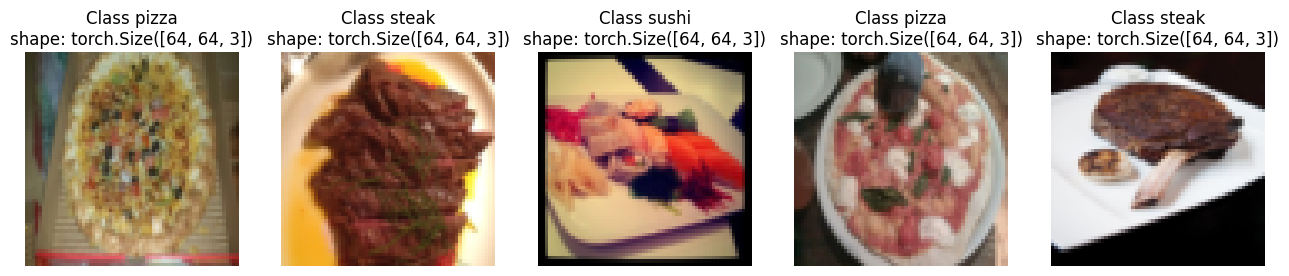

In [41]:
display_random_images(train_data_custom,
                      n=5,
                      classes=train_data_custom.classes,
                      seed=None)

In [42]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=0)
test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=0)

In [43]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1be021907d0>,
 <torch.utils.data.dataloader.DataLoader at 0x1be008406d0>)

In [45]:
image_custom, label_custom = next(iter(train_dataloader_custom))
print(f"{image_custom.shape, label_custom.shape}")

(torch.Size([32, 3, 64, 64]), torch.Size([32]))


In [46]:
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size=(128, 128)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                       transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(size=(128, 128)),
                                      transforms.ToTensor()])


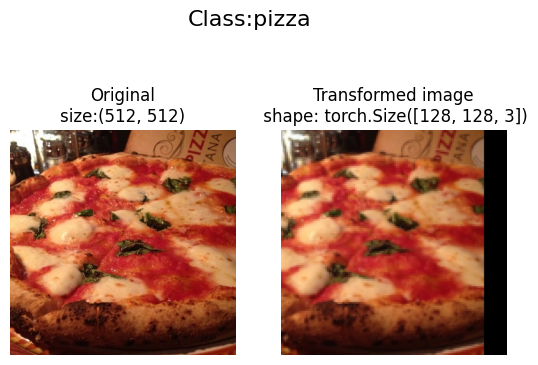

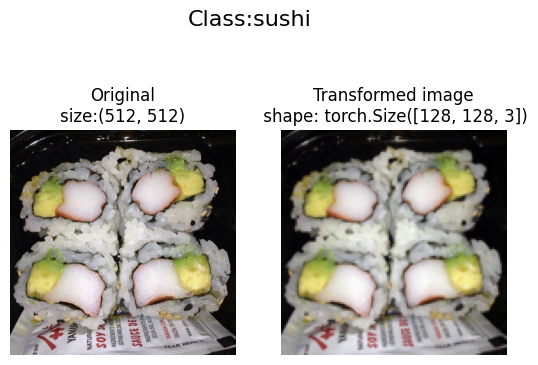

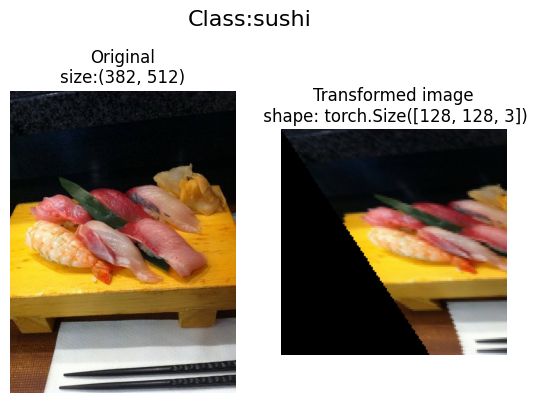

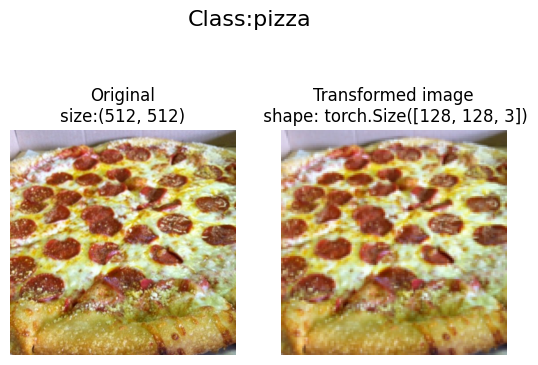

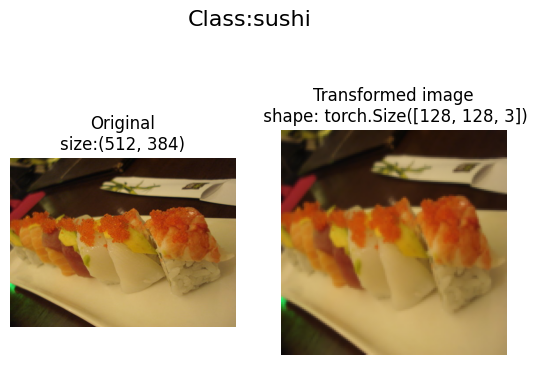

In [58]:
plot_transformed_images(image_path=list(pathlib.Path("data/pizza_steak_sushi/train").glob("*/*.jpg")),
                        transform=train_transforms,
                        n=5,
                        seed=None)

In [56]:
list(pathlib.Path("data/pizza_steak_sushi/train").glob("*/*.jpg"))


[WindowsPath('data/pizza_steak_sushi/train/pizza/1008844.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1033251.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1044789.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1089334.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1105700.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/12301.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1285298.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/138855.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1412034.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1524655.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1572608.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1633289.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1649276.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1654444.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 WindowsPath('data/pizza_steak_sushi/train/

# Make Model 0: TinyVGG

In [67]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                      transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                     transforms.ToTensor()])


In [68]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_data = ImageFolderCustom(targ_dir="data/pizza_steak_sushi/train", transform=train_transform)
test_data = ImageFolderCustom(targ_dir="data/pizza_steak_sushi/test", transform=test_transform)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [78]:
import torch
from torch import nn


class TinyVGG0(nn.Module):
    def __init__(self, input_shape: int, hidden_shape: int, output_shape: int):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_shape, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_shape, out_channels=hidden_shape, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=hidden_shape * 13 * 13, out_features=output_shape))

    def forward(self, x):
        # x = self.block1(x)
        # x = self.block2(x)
        # print(x.shape)
        # return self.classifier(x)
        return self.classifier(self.block2(self.block1(x)))


In [79]:
INPUT_SHAPE = 3
HIDDEN_UNITS = 10
OUT_SHAPE = len(train_data.classes)

model0 = TinyVGG0(input_shape=INPUT_SHAPE, hidden_shape=HIDDEN_UNITS, output_shape=OUT_SHAPE)
model0

TinyVGG0(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [80]:
with torch.inference_mode():
    image_batch, label_batch = next(iter(train_dataloader))
    model0(image_batch)

In [81]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch, label_batch

(tensor([[[[0.5647, 0.5765, 0.5804,  ..., 0.4000, 0.3961, 0.3804],
           [0.5216, 0.5765, 0.5961,  ..., 0.4118, 0.3961, 0.3843],
           [0.5294, 0.5373, 0.5451,  ..., 0.4196, 0.3961, 0.3843],
           ...,
           [0.4549, 0.4235, 0.4196,  ..., 0.9255, 0.8784, 0.8588],
           [0.4980, 0.4549, 0.4157,  ..., 0.8902, 0.8745, 0.8627],
           [0.5529, 0.4941, 0.4471,  ..., 0.8941, 0.8863, 0.8431]],
 
          [[0.3804, 0.3882, 0.3922,  ..., 0.2039, 0.2000, 0.1961],
           [0.3373, 0.3804, 0.4000,  ..., 0.2078, 0.1961, 0.1922],
           [0.3412, 0.3451, 0.3490,  ..., 0.2118, 0.1961, 0.1843],
           ...,
           [0.2157, 0.1804, 0.1569,  ..., 0.2235, 0.1373, 0.1137],
           [0.2627, 0.2157, 0.1725,  ..., 0.1333, 0.1176, 0.1216],
           [0.3216, 0.2588, 0.2039,  ..., 0.1333, 0.1333, 0.1098]],
 
          [[0.1255, 0.1294, 0.1255,  ..., 0.0824, 0.0784, 0.0745],
           [0.1176, 0.1569, 0.1647,  ..., 0.0824, 0.0784, 0.0863],
           [0.1373, 0.12

In [88]:
from torchinfo import summary

summary(model0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG0                                 [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

In [109]:
from sklearn.metrics import accuracy_score


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: str):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_logit = model(X)
        loss = loss_fn(y_logit, y)
        train_loss += loss.item()
        y_pred = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
        train_acc += accuracy_score(y.to("cpu"), y_pred.to("cpu"))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [119]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: str):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_logit = model(X)
            test_loss += loss_fn(y_logit, y).item()
            test_acc += accuracy_score(y.to("cpu"), y_logit.argmax(dim=1).to("cpu"))

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    return test_loss, test_acc

In [120]:
from tqdm.auto import tqdm


def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int = 5,
          device: str = "cpu"):
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    model.to(device)
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model, dataloader=train_dataloader, loss_fn=loss_fn,
                                           optimizer=optimizer, device=device)
        test_loss, test_acc = test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn, device=device)

        print(
            f"Epoch {epoch} | train: Loss {train_loss:.6f} Accuracy {train_acc:.2f} | test: Loss {test_loss:.6f} Accuracy {test_acc:.2f}")

        results["train_acc"].append(train_acc)
        results["train_loss"].append(train_loss)
        results["test_acc"].append(test_acc)
        results["test_loss"].append(test_loss)

    return results


In [143]:
torch.manual_seed(42)
num_epochs = 5

model0 = TinyVGG0(input_shape=3, hidden_shape=10, output_shape=len(train_data.classes))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(), lr=0.001)

from timeit import default_timer as timer

start_time = timer()
model0_result = train(model=model0, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn,
                      optimizer=optimizer, epochs=num_epochs, device="cuda")
stop_time = timer()

print(f"Total time = {stop_time - start_time:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 | train: Loss 1.106883 Accuracy 0.31 | test: Loss 1.099268 Accuracy 0.27
Epoch 1 | train: Loss 1.087264 Accuracy 0.41 | test: Loss 1.061478 Accuracy 0.54
Epoch 2 | train: Loss 1.127277 Accuracy 0.28 | test: Loss 1.045527 Accuracy 0.54
Epoch 3 | train: Loss 1.099102 Accuracy 0.29 | test: Loss 1.092435 Accuracy 0.20
Epoch 4 | train: Loss 1.112050 Accuracy 0.35 | test: Loss 1.077610 Accuracy 0.58
Total time = 5.078


In [144]:
model0_result

{'train_loss': [1.1068832278251648,
  1.0872639790177345,
  1.1272767931222916,
  1.099102422595024,
  1.112050473690033],
 'train_acc': [0.30859375, 0.41015625, 0.28125, 0.29296875, 0.3515625],
 'test_loss': [1.0992676417032878,
  1.0614779194196065,
  1.0455270409584045,
  1.092435399691264,
  1.0776103734970093],
 'test_acc': [0.2708333333333333,
  0.5416666666666666,
  0.5416666666666666,
  0.19791666666666666,
  0.5833333333333334]}

In [145]:
def plot_loss_curve(results: Dict[str, List[float],]):
    epochs = range(len(results["train_loss"]))
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results["train_loss"], label="Train_loss")
    plt.plot(epochs, results["test_loss"], label="Test_loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, results["train_acc"], label="Train_accuracy")
    plt.plot(epochs, results["test_acc"], label="Test_accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()



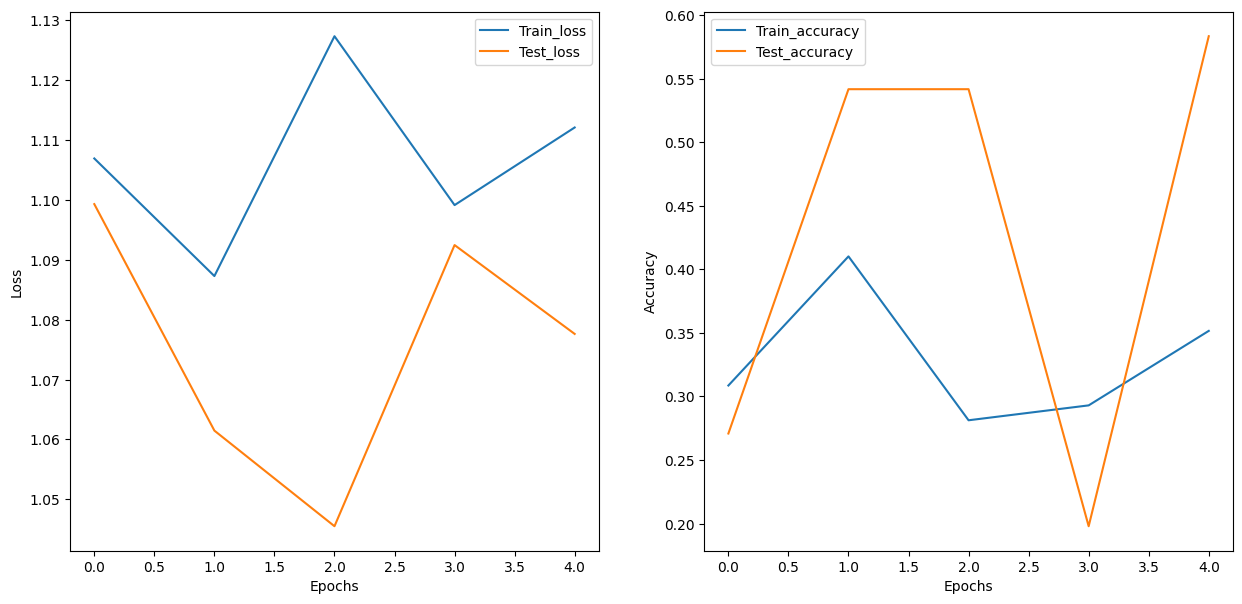

In [146]:
plot_loss_curve(model0_result)

# Model1

In [147]:
train_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                      transforms.TrivialAugmentWide(31),
                                      transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                     transforms.ToTensor()])
import torchvision.datasets as datasets

train_data = datasets.ImageFolder(root="data/pizza_steak_sushi/train", transform=train_transform)
test_data = datasets.ImageFolder(root="data/pizza_steak_sushi/test", transform=test_transform)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [148]:
model1 = TinyVGG0(input_shape=3,
                  hidden_shape=10,
                  output_shape=len(train_data.classes))
model1

TinyVGG0(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [149]:
num_epoch = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
start_time = timer()
model1_results = train(model1, train_dataloader, test_dataloader, loss_fn, optimizer, num_epoch, "cuda")
stop_time = timer()
print(f" time: {stop_time - start_time} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 | train: Loss 1.106930 Accuracy 0.25 | test: Loss 1.104204 Accuracy 0.20
Epoch 1 | train: Loss 1.103058 Accuracy 0.27 | test: Loss 1.085464 Accuracy 0.54
Epoch 2 | train: Loss 1.094484 Accuracy 0.39 | test: Loss 1.092465 Accuracy 0.26
Epoch 3 | train: Loss 1.110009 Accuracy 0.30 | test: Loss 1.106513 Accuracy 0.26
Epoch 4 | train: Loss 1.089327 Accuracy 0.43 | test: Loss 1.114098 Accuracy 0.26
 time: 4.809155099996133 seconds


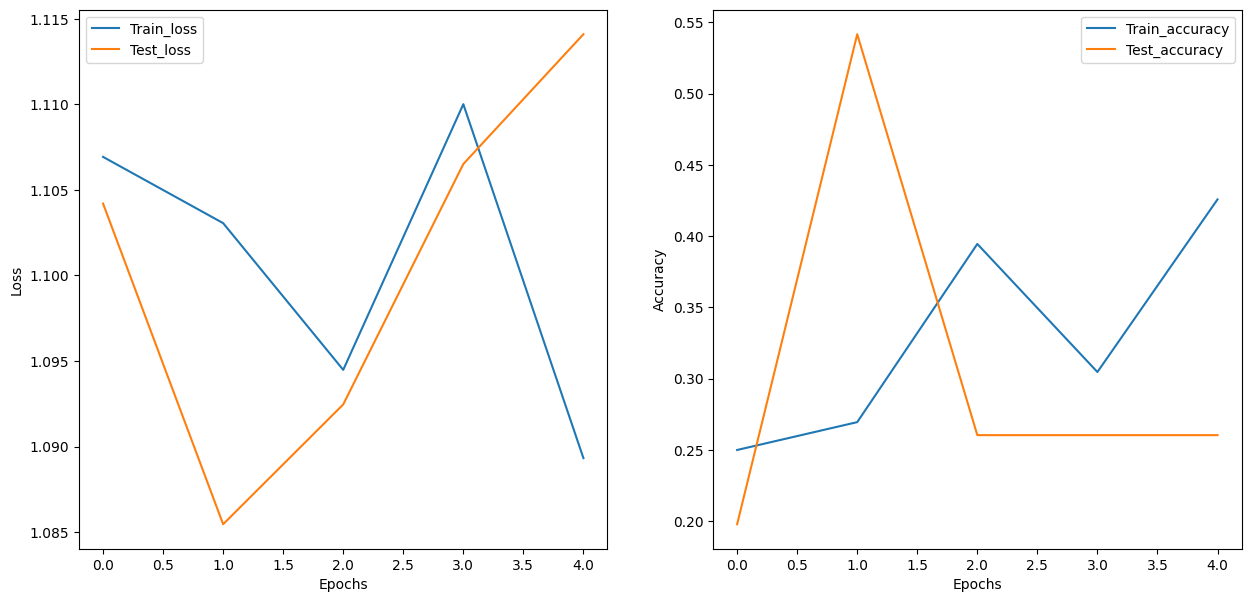

In [150]:
plot_loss_curve(model1_results)

In [151]:
import pandas as pd

model0_df = pd.DataFrame(model0_result)
model1_df = pd.DataFrame(model1_results)

In [152]:
model0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106883,0.308594,1.099268,0.270833
1,1.087264,0.410156,1.061478,0.541667
2,1.127277,0.281250,1.045527,0.541667
3,1.099102,0.292969,1.092435,0.197917
4,1.112050,0.351562,1.077610,0.583333


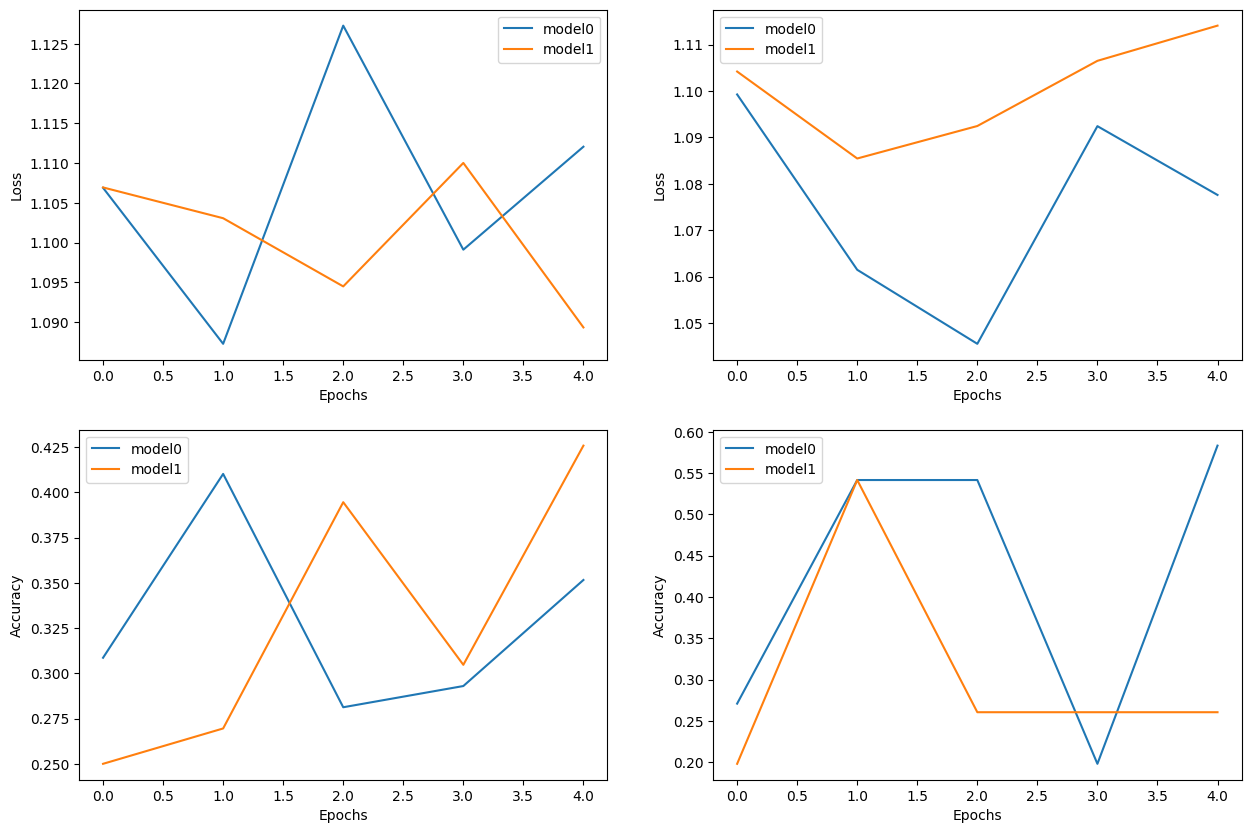

In [155]:
plt.figure(figsize=(15, 10))
epochs = range(len(model0_df))
plt.subplot(2, 2, 1)
plt.plot(epochs, model0_df["train_loss"], label="model0")
plt.plot(epochs, model1_df["train_loss"], label="model1")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model0_df["test_loss"], label="model0")
plt.plot(epochs, model1_df["test_loss"], label="model1")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model0_df["train_acc"], label="model0")
plt.plot(epochs, model1_df["train_acc"], label="model1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model0_df["test_acc"], label="model0")
plt.plot(epochs, model1_df["test_acc"], label="model1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


In [177]:
import torchvision

custom_data = torchvision.io.read_image("194643.jpg").type(torch.float) / 255

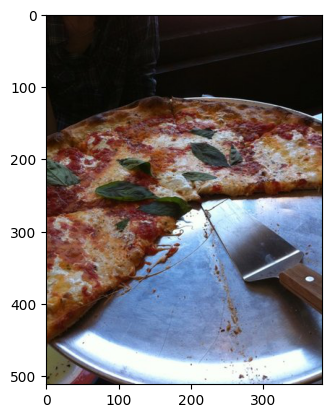

In [178]:
plt.imshow(custom_data.permute(1, 2, 0))

In [179]:
trans = transforms.Compose([transforms.Resize(size=(64,64))])
custom_data = trans(custom_data)

C:\All Python Projects\Interpreters\in_Machine_Learning_GPU118\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [180]:
custom_data.shape

torch.Size([3, 64, 64])

In [181]:
custom_data=custom_data.unsqueeze(dim=0).to("cuda")
model1.eval()
with torch.inference_mode():
    pred = model1(custom_data)

In [182]:
custom_data.shape

torch.Size([1, 3, 64, 64])

In [185]:
pred

tensor([[ 0.0565, -0.0552, -0.0561]], device='cuda:0')

In [190]:
torch.softmax(pred,dim=1).argmax(dim=1)

tensor([0], device='cuda:0')

In [191]:
class_names[0]

'pizza'